In [2]:
#data collection and analysis
import pandas as pd
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
data.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
#seperating features and labels
X = data.drop(columns = 'Outcome' ,axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y = data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
#data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardization = scaler.fit_transform(X)

In [11]:
X = standardization
print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [12]:
#train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)#, stratify = y,random_state = 2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [13]:
#training the model
from sklearn import svm
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,y_train)


SVC(kernel='linear')

In [55]:
#model evaluation - Accuracy score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
train_prediction = classifier.predict(X_train)
train_score = accuracy_score(train_prediction, y_train)
print('Accuracy score = ',train_score)

Accuracy score =  0.7687296416938111


In [15]:
test_prediction = classifier.predict(X_test)
test_score = accuracy_score(test_prediction, y_test)
print('Accuracy score = ',test_score)

Accuracy score =  0.7792207792207793


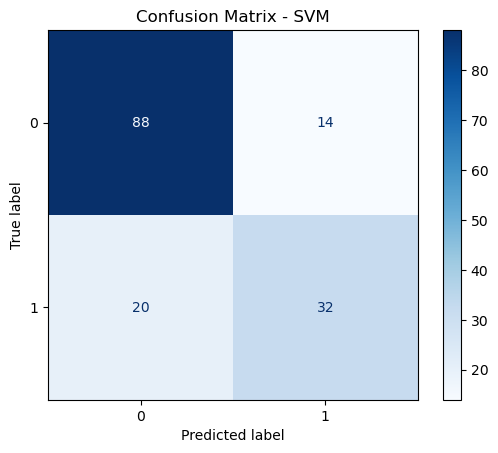

Accuracy Score: 0.7792207792207793


In [65]:
# After model prediction
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [16]:
#prediction system
import numpy as np
input = (10,	85	,66	,29,	0	,26.6	,0.351	,55)
input_data = np.asarray(input)
reshaped_input_data = input_data.reshape(1,-1)

std_data = scaler.transform(reshaped_input_data)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction == 0):
    print('Non Diabetic')
else:
    print('Diabetic')

[[ 1.82781311 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078  1.85143417]]
[0]
Non Diabetic


C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


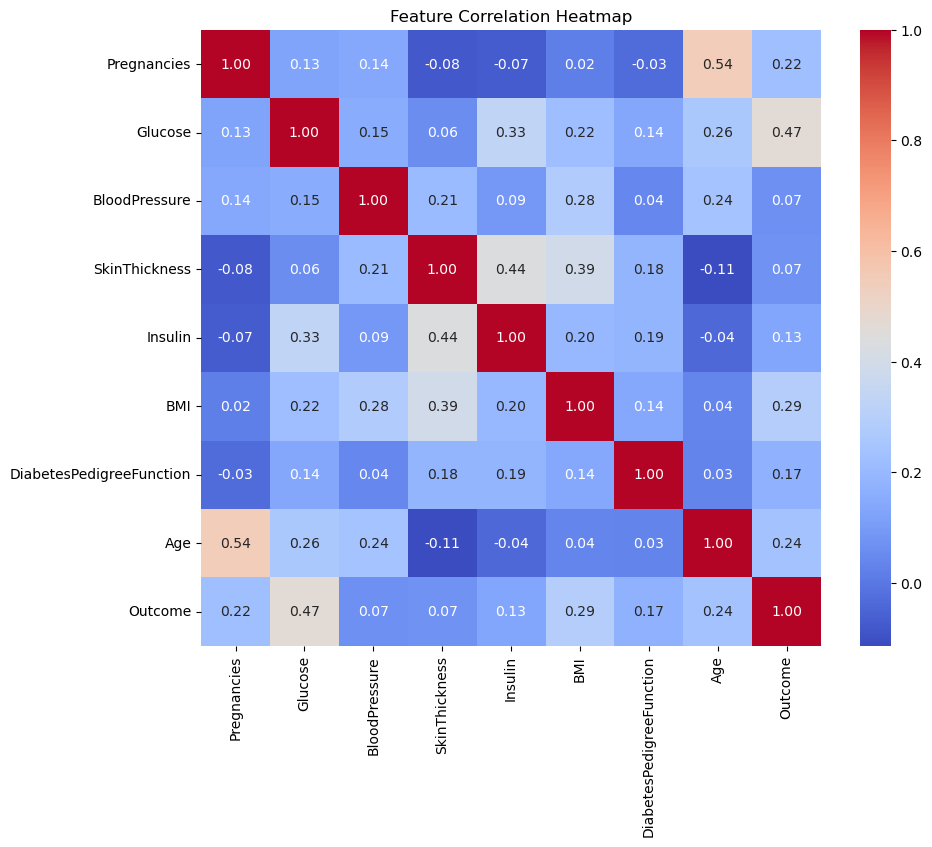

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

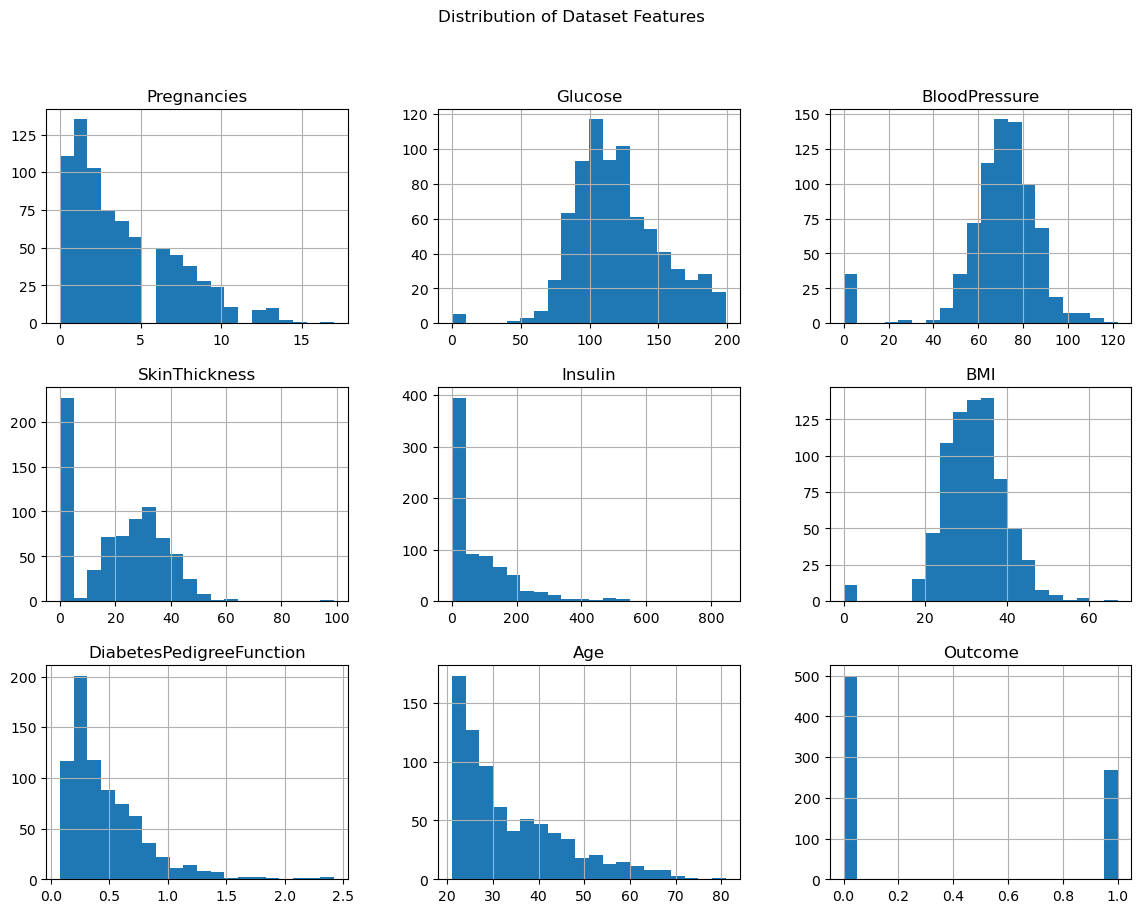

In [43]:
data.hist(bins=20, figsize=(14, 10), color='#1f77b4')
plt.suptitle("Distribution of Dataset Features")
plt.show()

C:\Users\prabh\AppData\Local\Temp\ipykernel_10800\2945427663.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Outcome', palette='Set2')


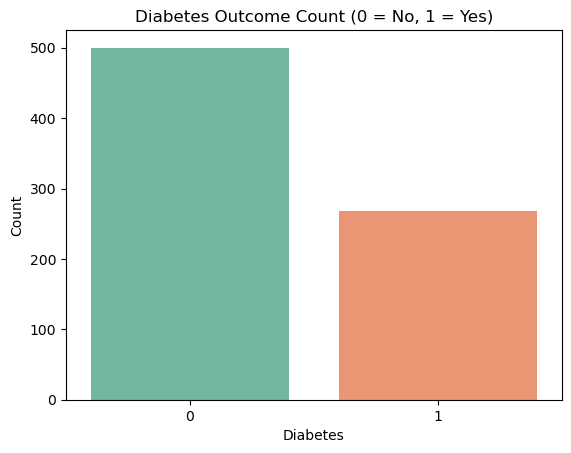

In [45]:
sns.countplot(data=data, x='Outcome', palette='Set2')
plt.title("Diabetes Outcome Count (0 = No, 1 = Yes)")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

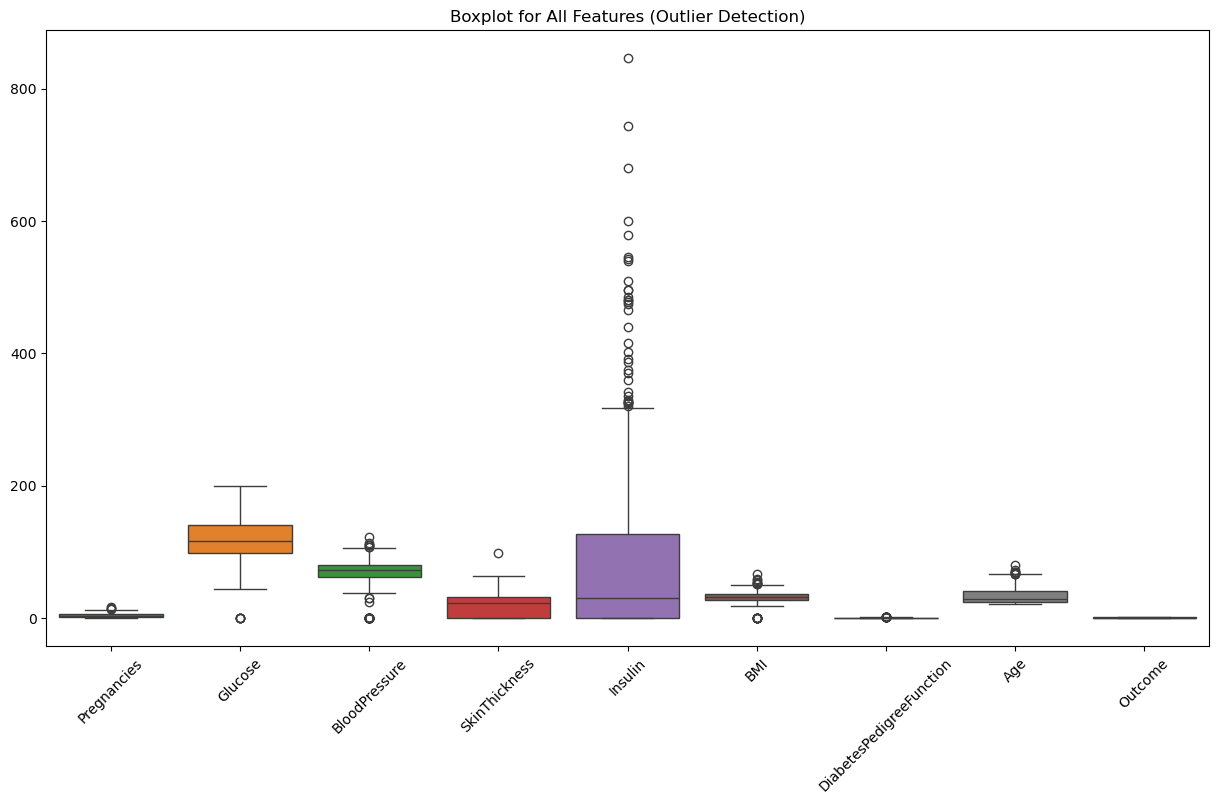

In [47]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title("Boxplot for All Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

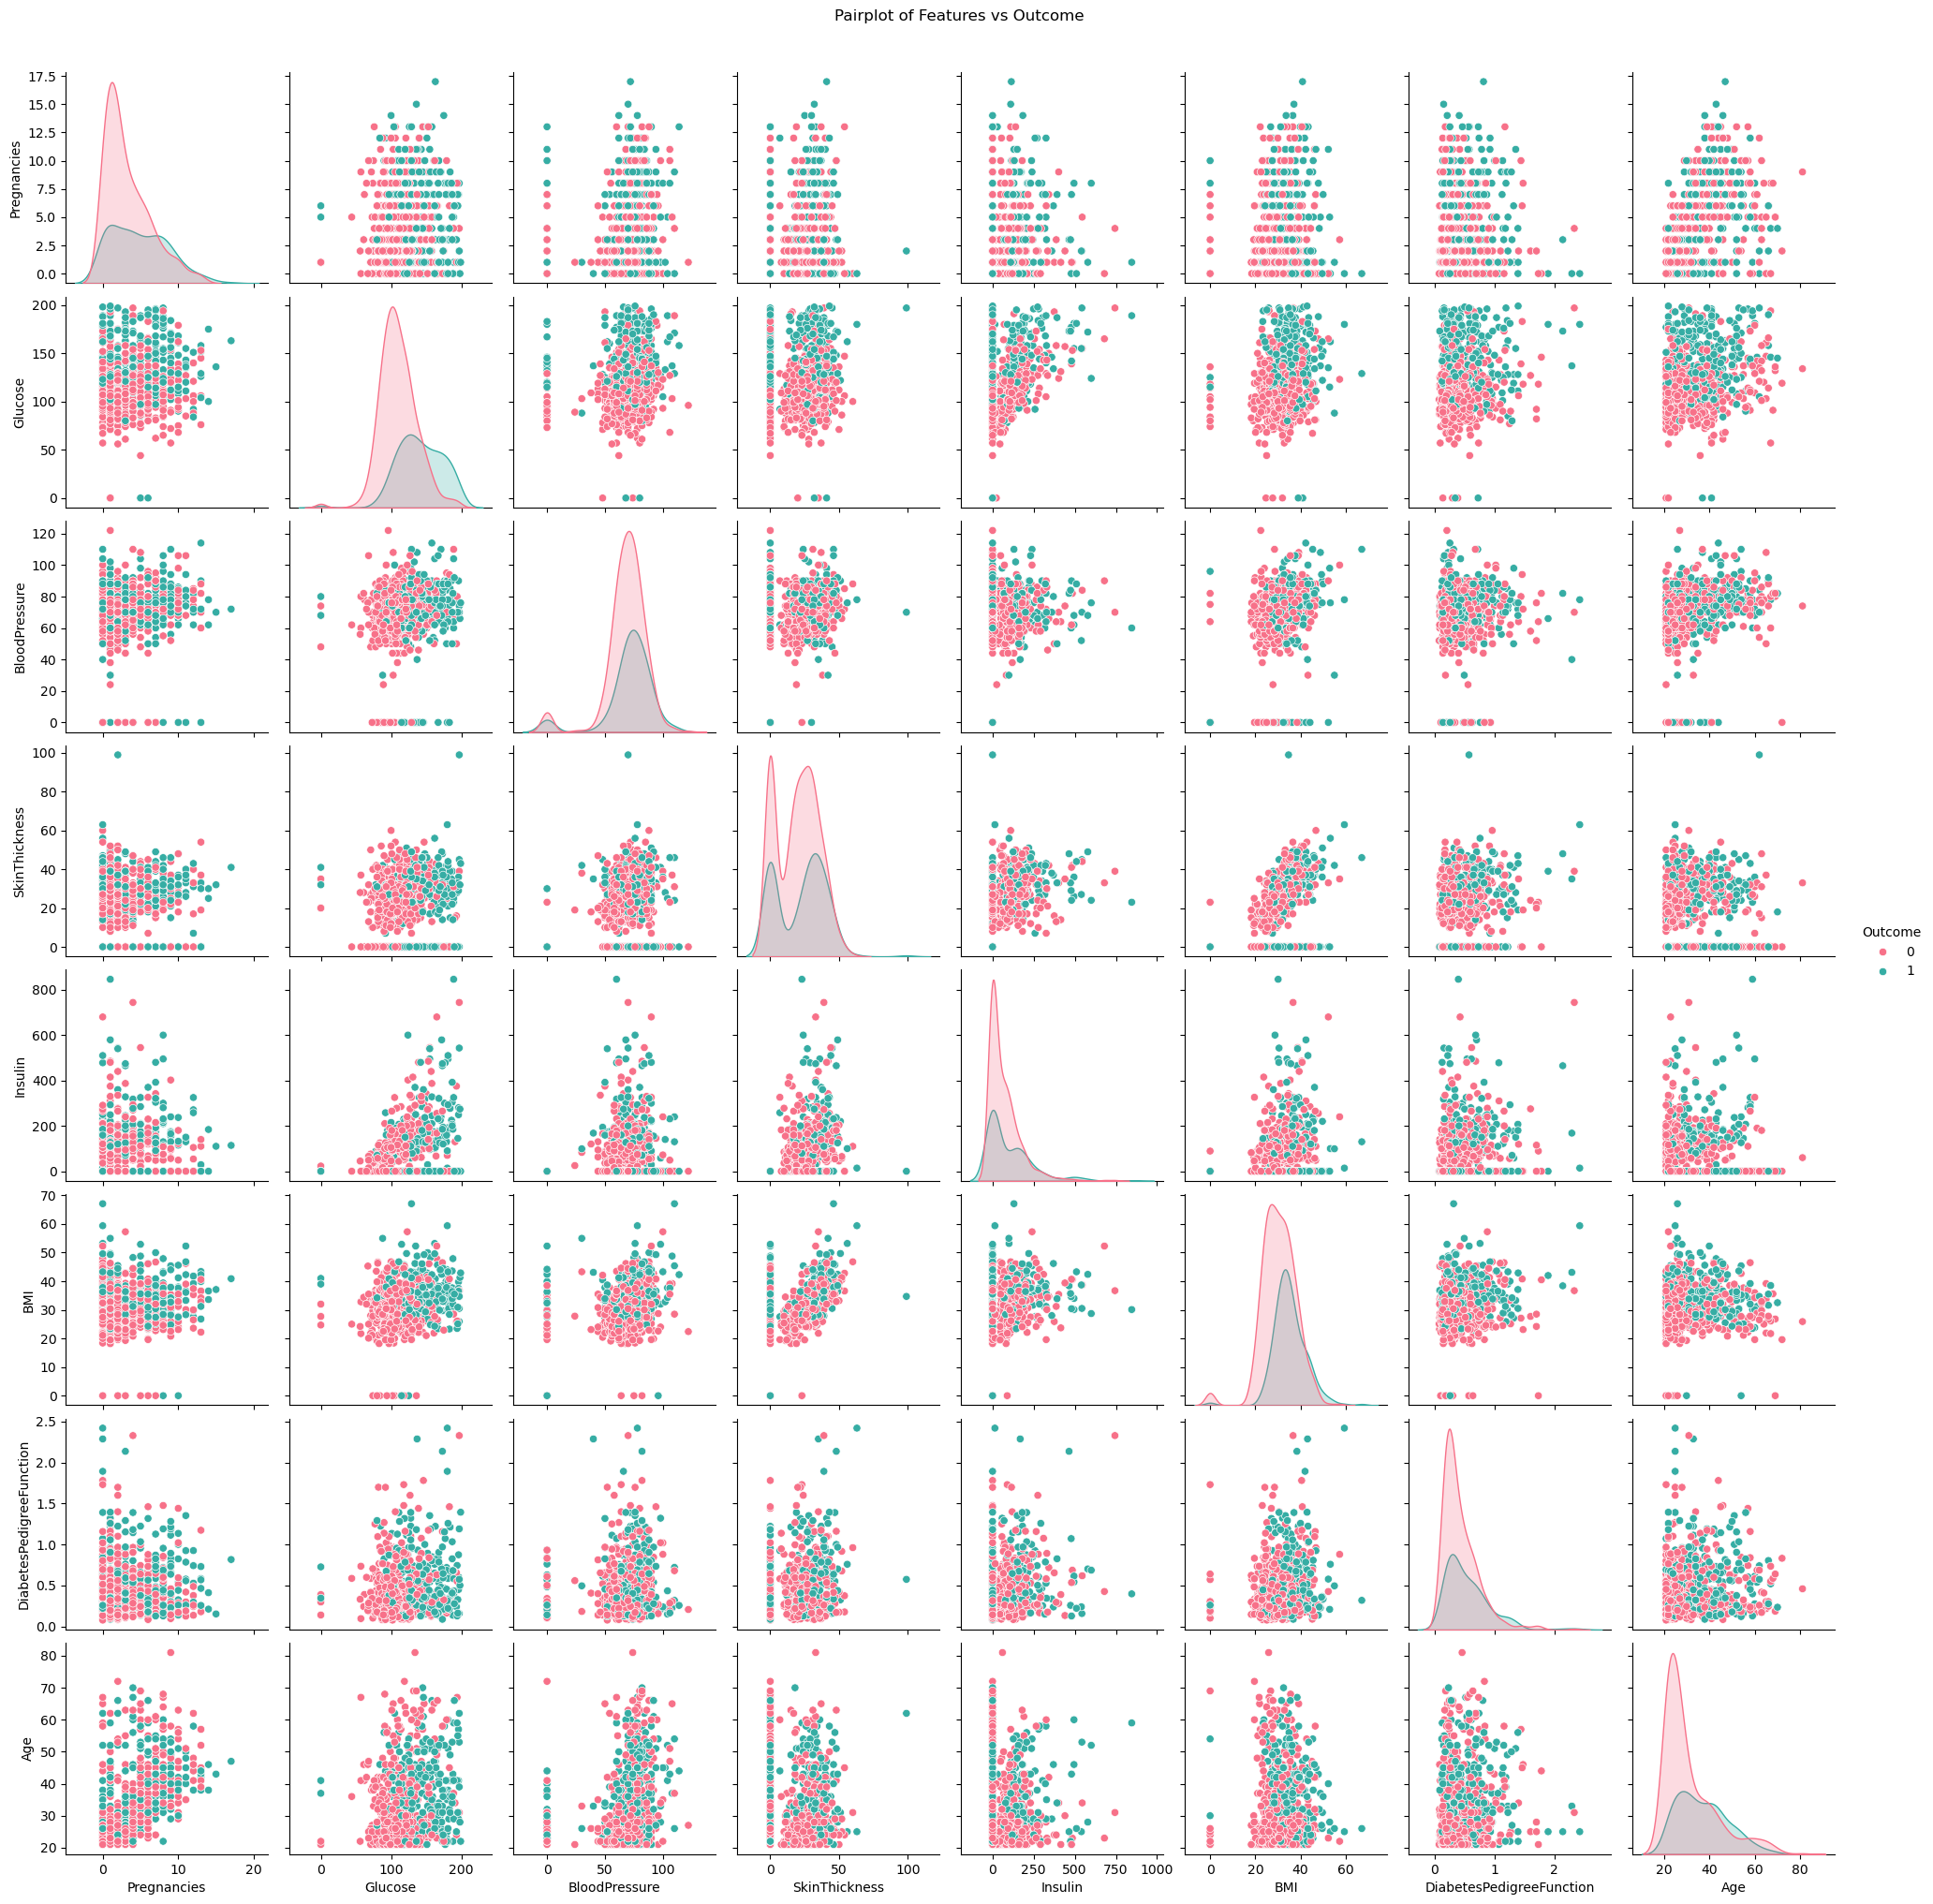

In [68]:
sns.pairplot(data, hue='Outcome', palette='husl')
plt.suptitle("Pairplot of Features vs Outcome", y=1.02)
plt.show()